In [338]:
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Unidad 01 - Estadística descriptiva y NumPy

En éste Notebook vamos a aprender aspéctos básicos de estadística descriptiva. Si bien Python incluye un [módulo de estadística](https://docs.python.org/3/library/statistics.html) desde la versión 3.4, aprovecharemos para aprender NumPy.

NumPy nació de la fusión de dos bibliotecas previas, Numeric y Numarray, que fueron fundamentales para el manejo de arrays multidimensionales en Python. Numeric, creado por Jim Hugunin en 1995, y Numarray, desarrollado a partir de 2001, ayudaron a establecer las bases para el análisis numérico en Python. En 2005, [Travis Olliphant](https://x.com/teoliphant) combinó las mejores características de ambas bibliotecas para crear NumPy, que se lanzó oficialmente en 2006. Desde entonces, NumPy se ha consolidado como una herramienta esencial en la computación científica y el análisis de datos, y sigue evolucionando con mejoras continuas en rendimiento y funcionalidad.

Documentación: https://numpy.org/doc/stable/index.html

Código fuente: https://github.com/numpy/numpy

*Este Notebook asume que ya tenés conocimientos básicos de Python y manejo de Jupyter Notebooks*

In [339]:
import pandas as pd

## El tipo array

Los array de numpy son arreglos ordenados de elementos del mismo tipo. Los vectores (arreglos unidimensionales), son similares a las listas. Ejecutar el siguiente código y observar los resultados.

In [340]:
import numpy as np

v = np.array([0, 3, 0, 3, 4, 5, 6])
w = np.array([0., 3., 0., 3., 4., 5., 6.])
print(v)
print(w)

[0 3 0 3 4 5 6]
[0. 3. 0. 3. 4. 5. 6.]


In [341]:
# El tipo de dato de un array de numpy es ndarray
print(type(v))
print(type(w))

# Para saber el tipo de los elementos contenidos en el array, usamos el atributo dtype
print(v.dtype)
print(w.dtype)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
int64
float64


**Para pensar en grupo**

1. Explicar los dtypes obtenidos.
2. Antes de probar: ¿Qué `dtype` se obtiene si inicializamos el array con `1, 1.3`? ¿por qué?
3. Otros atributos importantes son `ndim`, `size`, `shape` y `nbytes`. ¿Qué hacen?

Los array son mas rápidos de recorrer y ocupan menor espacio en memoria que una lista o una tupla. Pero desde el punto de vista práctico, la principal ventaja de usar numpy es que los operadores matemáticos (ej. `+`, `-`, `*`, `/`) aplican elemento a elemento y por lo tanto no requieren ciclos explícitos. Ejecutar los siguientes comandos e interpretar los resultados.

In [342]:
x = np.array([1.0, 2.0, 3.0])
y = np.array([4, 5, 6])
print("x = ", x)
print("y = ", y)

# Un array y un escalar
a = x + 2
print("x + 2 = ", a)
b = y - 4
print("y - 4 = ", b)
c = 2 * x
print("2 * x = ", c)
d = y / 3
print("y / 5 = ", d)

# Un array y un array
print("x + y = ", x + y)
print("x - y = ", x - y)
print("x * y = ", x * y)
print("x / y = ", x / y)
print(d.ndim) # dimencion de d
print(d.size)
m = np.array([[1,2,3],[1,2,3]]) # dimencion 3x2
print(m.shape)




x =  [1. 2. 3.]
y =  [4 5 6]
x + 2 =  [3. 4. 5.]
y - 4 =  [0 1 2]
2 * x =  [2. 4. 6.]
y / 5 =  [1.33333333 1.66666667 2.        ]
x + y =  [5. 7. 9.]
x - y =  [-3. -3. -3.]
x * y =  [ 4. 10. 18.]
x / y =  [0.25 0.4  0.5 ]
1
3
(2, 3)


*Una notación muy cómoda incluida en Python 3.8 son los debug f-strings, que permite hacer cosas como la siguiente: `print(f"{x + y = }")`. Probala y usala si te resulta útil.*

In [343]:
print(f"{x + y = }")

x + y = array([5., 7., 9.])


**Para pensar en grupo**
1. Explicar los dtypes obtenidos en cada caso
2. Aplicar otros operadores (`**`, `%`, `>=`, `>`, `<=`, `<`, `!=`, `==`)
3. Antes de probar: ¿qué pasa si utilizo dos array de distinto `shape`?

**Para buscar**: Una forma usual para incializar un array es crear uno lleno de 0 o de 1. Buscar con que funciones puede hacerse. ¿Qué parametros toma?

In [344]:
def array0(x:int):
  f = []
  for i in range(x):
    f.append(0)
  return f

array0(5) # x parametro de tipo int

[0, 0, 0, 0, 0]

In [345]:
print(a.dtype)
print(b.dtype)
print(c.dtype)
print(d.dtype)


float64
int64
float64
float64


## Accediendo a los elementos de un array

Tal como ocurre con una lista o una tupla, puede obtenerse un elemento de un array utilizando los corchetes `[]`. Algunas reglas básicas:
1. El primer elemento es el `0` (siguiendo el estandar de C y la sugerencia en el [escrito clásico de Dijkstra](https://www.cs.utexas.edu/users/EWD/transcriptions/EWD08xx/EWD831.html)). Ej. `w[0]`
2. y el segundo es el `1`, el tercero es el `2` y así sucesivamente.
3. Puede también obtener el último elemento con el `-1` Ej. `w[-1]`
4. y el anteúltimo (`-2`), antepenúltimo (`-3`) y así sucesivamente.
5. Utilizando los dos puntos `:` puede obtenerse un `slice`: `a:b` signfica tomar todos los elementos desde el `a` (incluido) hasta el `b` (excluido). Ej. `w[1:7]`
6. y puede agregarse también el paso: `a:b:c` signfica tomar todos los elementos desde el `a` (incluido) hasta el `b` (excluido) de haciendo pasos de largo `c` Ej. `w[1:7:2]`

**Para hacer y pensar**
1. Probar los ejemplos. Modificarlos para entender los parámetros.
2. ¿Qué pasa si los indices requeridos no están en el rango del array?
3. `a`, `b`, `c` pueden estar ausentes. ¿Qué pasa en cada caso?
4. ¿Cuál es la diferencia entre `w[1]` y `w[1:2]`?
5. ¿Cómo podes usar lo aprendido para invertir el orden de los elemento en un array (que el primero esté ultimo y el último primero)?
6. ¿Cómo podes usar lo aprendido para obtener todos los elementos en posiciones pares? ¿Cómo puede usar lo aprendido para obtener todos los elementos en posiciones impares?
7. La misma sintaxis sirve para asignar nuevos valores. Hace la prueba

In [346]:
f = np.array([[3,4],[4,6],[2,4],[2,5]])
print(f)
print(f[0]>=f[1])
print(f.shape)
print(f[-1][-1])
print(f[-1][-2])
print(f[0:100])
print(f[1], f[1:2])
# falta lo de hacer y pensar

[[3 4]
 [4 6]
 [2 4]
 [2 5]]
[False False]
(4, 2)
5
2
[[3 4]
 [4 6]
 [2 4]
 [2 5]]
[4 6] [[4 6]]


In [347]:
def invertir(lista):
  return lista[::-1]

def invertir2(lista:[int]):
  lista2 = []
  for i in range(len(lista)):
    lista2.append(lista[len(lista) -i - 1])
  return lista2

def pares(lista:[int]):
  par = []
  for i in range(len(lista)):
    if i%2 == 0:
      par.append(lista[i])
  return par

def impares(lista:[int]):
  impar = []
  for i in range(len(lista)):
    if i%2 != 0:
      impar.append(lista[i])
  return impar

print(invertir2([1,2,3,4,5]))
print(pares([1,2,3,4,5]))
print(impares([1,2,3,4,5]))

[5, 4, 3, 2, 1]
[1, 3, 5]
[2, 4]


## Funciones

Asi como los operadores aplican sobre cada elemento del array, hay muchas operaciones como `cos`, `sin`, `tan`, `sqrt` que tambien lo hacen. Lo mismo pasa con `round`, `ceil`, `floor`. Otras cómo `logical_and`, `logical_or`, `hypot` operan sobre mas de un array y devuelven otró. Finalmente, otras como `sum`, `all`, `any` toman un array y devuelven un escalar.

1. Busca estas funciones en la documentación de NumPy y probalas.
2. Muchas (¿todas?) de estas funciones tienen un parámetro llamado `out`. ¿Para qué sirve?
3. ¿Qué diferencia hay entre la función `max` y `argmax`?

In [348]:
x = 4.2
y = np.array([[2,3,4],[3,5,2]])
print(np.cos(x))
print(np.sin(x))
print(np.tan(x))
print(np.sqrt(x))
print(np.round(x))
print(np.ceil(x))
print(np.floor(x))
print(np.hypot(y,x))
print(np.sum(y))
print(np.all(y))
print(np.any(y))
print(np.max(y))
print(np.argmax(y))

-0.4902608213406994
-0.8715757724135882
1.7777797745088417
2.04939015319192
4.0
5.0
4.0
[[4.65188134 5.16139516 5.8       ]
 [5.16139516 6.52993109 4.65188134]]
19
True
True
5
4


También podes escribir tus propias funciones que tomen arrays

In [349]:
def norma_euclidea(vec):
    """Calcula la normal euclidea de un vector."""
    return np.sqrt(np.sum(vec * vec))

Escribi las siguientes funciones
1. devuelva la cantidad de elementos positivos dentro de un array.
2. devuelva la cantidad de elementos x, tal que a <= x <= b (con a y b parametros de la función). Nota: cuando haces operaciones múltiples la precedencia de los operadores es importante. Fijate como son las de Python.
3. busque el maximo del array y lo reemplace por 0.

In [350]:
#1)
x= np.array([1,9,3,5,-1])
def positivos(y):
  suma = 0
  for i in range(len(y)):
    if y[i]>0:
      suma+=1
  return suma

print(positivos(x))

4


In [351]:
#2)
def cantidadElementos(a:int, b:int, lista:[int]):
  cantidad = 0
  for i in range(len(lista)):
    if lista[i]>=a and lista[i]<=b:
      cantidad+=1
  return cantidad

print(cantidadElementos(1,5,[0,1,2,4,6]))



3


In [352]:
#3)
x = [1,2,10,5,7,-1,9]
def maximo(y):
  maximo = y[0]
  for i in range(len(y)):
    if y[i]> maximo:
      maximo = y[i]
  for j in range(len(y)):
    if y[j]==maximo:
      y[j]=0
  return y


print(maximo(x))


[1, 2, 0, 5, 7, -1, 9]


## Estadística descriptiva

Cuando un conjunto de datos empieza a ser mas grande es conveniente definir algunos observables para resumirlos. Bien usados, pueden utilizarse para buscar tendencias, comparar conjuntos de datos, identificar anomalías.

- La **tendencia central** sobre informa sobre los centros de los datos. Los observables mas comunes incluyen la **media** y la **mediana**.
- La **variabilidad**  informa sobre la dispersión de los datos. Los observables mas comunes incluyen la **desviación estándar** y el **rango intercuartil**.
- La correlación o variabilidad conjunta le informa sobre la relación entre un par de variables en un conjunto de datos. Las medidas útiles incluyen la **covarianza** y el **coeficiente de correlación**.

**Para hacer usando sólo operadores matemáticos y `np.sum`**
1. Busca la definición matemática y escribí una función para calcular la media.
2. Busca la definición matemática y escribí una función para calcular la desviación estandar.

En Jupyter Notebook se puede escribir formulas en $\LaTeX$ poniendo el contenido deseado entre `$`. Esto permite crear Jupyter Notebooks que no solo sean ejecutables sino también que se lean como un libro. Si sabes $\LaTeX$ (o querés aprender), pone la formula de la media y la desviacion estandar.

In [353]:
#media
x = [1,2,3,4,5,6,7,8,9,10]
def media(y):
  suma = 0
  cantidad = 0
  for i in range(len(y)):
    suma+=y[i]
    cantidad+=1
  return suma/cantidad

#desv. estandar
def desv(y):
  sumatoria = 0
  for i in range(len(y)):
    m = (y[i] - media(y))**2
    sumatoria+=m
  return (sumatoria/len(y))**0.5

print(media(x))
print(np.mean(x))
print(np.std(x))
print(desv(x))
print(np.ptp(x))

5.5
5.5
2.8722813232690143
2.8722813232690143
9


**Para hacer**
1. Armá un array con la altura de las 10 personas que tengas a tu alrededor.
2. Aplicá la función `np.ptp`. ¿Qué hace?
3. Calculá usando funciones de numpy la media y la desviación estandar.
4. Calculá usando funciones de numpy la mediana y rango intercuartil.
5. En algunos casos, hay datos faltantes o incorrectos que se anotan como Not a Number (`np.nan`). Agrega ese dato al array y fijate que pasa con los resultados de los puntos 2 a 4. ¿Cómo podes solucionarlo?

El 25th percentile es llamado first quartile (primer cuantil)

El 50th percentile es llamado the median (la mediana)

El 75th percentile es llamado third quartile (tercer cuantil)

El 40th percentile tendrá el 40% de los 10 números restantes por debajo (40% de 10 es 4) y 60% de los números encima de él (60% de 10 es 6).


In [354]:
d = [1.50, 1.60, 1.67, 1.70, 1.80, 1.56, 1.78, 1.60, 1.66, 1.63]
#mediana
mediana = np.median(d)
d2 = np.array(d)
primer_cuantil = np.percentile(d2, 25)
tercer_cuantil = np.percentile(d2, 75)

print(primer_cuantil)
print(tercer_cuantil)
print("Rango Intercuantil: ", tercer_cuantil - primer_cuantil)
print(mediana)
print(np.ptp(d2))


1.6
1.6925
Rango Intercuantil:  0.0924999999999998
1.645
0.30000000000000004


## Azar (o casi)

Con la computadora es muy facil generar datos [pseudoaleatorios](https://en.wikipedia.org/wiki/Pseudorandom_number_generator) y asi aprender estadísitica.

In [355]:
rng = np.random.default_rng()  # creamos un Random Number Generator (RNG)

**Para hacer**

1. ¿Qué hace el parámetro `size`?
2. Buscar qué hace el parámetro `replace` en la función `choice` y probar.
3. ¿Qué`pasa si lo corren otra vez? ¿Dá igual?
4. ¿Salió mitad de las veces cara y mitad de las veces ceca?
5. Simular 10 lanzamientos de una moneda y calcular el promedio de veces que sale cara. Repetir para $n = 1000$ y $n = 100.000$.

In [356]:
from os import replace
# Con la función choice podemos elegir entre un grupo finito de opciones
x = np.array(["cara", "ceca"])
tiros = rng.choice(x, size=10)

def remplzar(y):
  for i in range(len(y)):
    m = y[i].replace('ceca','CECA')
    y[i] = m
  return y

def promedio(y):  # a mas tiros baja el promedio
  suma = 0
  for i in range(len(y)):
    if y[i] == 'cara':
      suma+=1
  return suma/len(y)

print(tiros)
print(remplzar(tiros))
print(promedio(tiros))
#print(np.size(rng.choice(x, size=10)))

['cara' 'cara' 'cara' 'cara' 'cara' 'ceca' 'ceca' 'ceca' 'cara' 'ceca']
['cara' 'cara' 'cara' 'cara' 'cara' 'CECA' 'CECA' 'CECA' 'cara' 'CECA']
0.6


In [357]:
# Con la función normal podemos obtener numeros al azar de una distribución normal.
rng.normal(0, 1, size=10)

array([ 0.20503315, -1.14568495, -0.5555075 , -0.14716211, -0.94523861,
        1.31209151,  1.22381986, -0.2853884 ,  1.44625842, -1.13215596])

**Para hacer y pensar en grupo**

Estás jugando a los dados. Se tiran dos, y se suman sus valores. Calculá con simulaciones la frecuencia con la que aparece cada valor. Compará con lo que esperás.

**Para hacer y pensar en grupo**

1. ¿Qué son los dos primero parámetros?
2. Simular 10 valores y calcular el promedio, la desviación estandar, la media y el rango intercuartil. Repetir para $n = 1000$ y $n = 100.000$.
3. Buscar que es el **error estandar de la media** y calcularlo. Luego elaborar un programa para entender con simulaciones

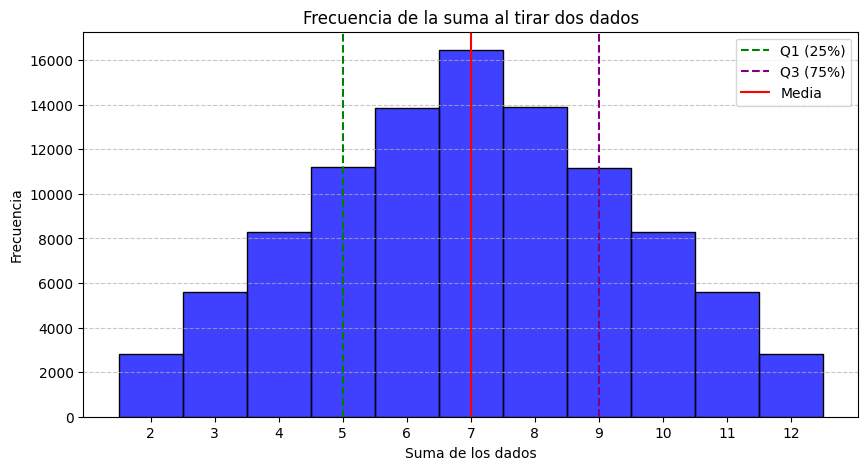

7.00095


In [358]:
# al tirar dos dados la suma de sus valores van del rango de [2,12]. Hago un array con la cantidad de combinaciones posible para que salgan esos valores.
# eje: para que la suma de 2, entinces tengo el (1,1) es la unica opcion, pero para que de 3 tengo (1,2) y (2,1)
"""3: (1, 2), (2, 1)
4: (1, 3), (2, 2), (3, 1)
5: (1, 4), (2, 3), (3, 2), (4, 1)
6: (1, 5), (2, 4), (3, 3), (4, 2), (5, 1)
7: (1, 6), (2, 5), (3, 4), (4, 3), (5, 2), (6, 1)
8: (2, 6), (3, 5), (4, 4), (5, 3), (6, 2)
9: (3, 6), (4, 5), (5, 4), (6, 3)
10: (4, 6), (5, 5), (6, 4)
11: (5, 6), (6, 5)
12: (6, 6) """

# Función para realizar una tirada de dos dados y devolver su suma
def tirar_dados(tiros, seed=42):
    np.random.seed(seed)  # Fijar semilla una sola vez
    random.seed(seed)  # También fijar la semilla para random
    suma_tiros = []
    for _ in range(tiros):
        dado1 = random.randint(1, 6)
        dado2 = random.randint(1, 6)
        suma_tiros.append(dado1 + dado2)
    return suma_tiros

#print(tirar_dados(100))
# al realizar mas tiros de dos dados independientes , entonces la frecuencia de la suma se aproxima a una distribucion normal

#rango intercuartil
def Q1YQ3(tiros):
    datos = tirar_dados(tiros)
    primer_cuartil = np.percentile(datos, 25)
    tercer_cuartil = np.percentile(datos, 75)
    return primer_cuartil, tercer_cuartil

# Calcular valores
q1, q3 = Q1YQ3(100000)
promedio = np.mean(tirar_dados(100000))
std = np.std(tirar_dados(100000))

# figura
plt.figure(figsize=(10, 5))
sns.histplot(tirar_dados(100000), bins=range(2, 14), discrete=True, kde=False, color='blue', edgecolor='black')

plt.axvline(q1, color='green', linestyle='--', label='Q1 (25%)')
plt.axvline(q3, color='purple', linestyle='--', label='Q3 (75%)')
plt.axvline(promedio, color='red', linestyle='-', label='Media')

plt.xlabel('Suma de los dados')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de la suma al tirar dos dados')
plt.xticks(range(2, 13))
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print(promedio) # veo q fuincione el seed cada ver que corro

**Azar reproducible**

En algunas ocasiones queremos repetir una o más realizaciones de una tirada al azar. Buscando sobre *seed* en la documentación de NumPy, logren un programa que repita la misma secuencia de realizaciones.

In [359]:
"""El seed=42 en np.random.seed(seed) sirve para que los números aleatorios generados sean siempre los mismos cada vez que ejecutes el código.

Sin una semilla, cada vez que corras el programa obtendrás una secuencia diferente de tiradas de dados. Con la semilla fija (42 en este caso, pero puede ser cualquier número), las tiradas serán idénticas en cada ejecución."""

'El seed=42 en np.random.seed(seed) sirve para que los números aleatorios generados sean siempre los mismos cada vez que ejecutes el código.\n\nSin una semilla, cada vez que corras el programa obtendrás una secuencia diferente de tiradas de dados. Con la semilla fija (42 en este caso, pero puede ser cualquier número), las tiradas serán idénticas en cada ejecución.'

## Arrays multidimensionales

Además de vectores, utilizando numpy pueden definirse arreglos multidimensionales a partir de listas anidadas.

Veamos algunas **matrices** (arreglos de dos dimensiones):

In [366]:
A = np.array([[3, 2, 2], [-1, 0, 1], [-2, 2, 4]])
B = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
C = np.array([[0, 1, -1], [5, -2, 1]])
A + B

array([[ 4,  2,  2],
       [-1,  1,  1],
       [-2,  2,  5]])

In [378]:
A[0,1] , A[1,0]
# columna 0 elemento en posicion 1 y columna 1 elemento en posicion 0
print(A@B) # PRODUCTO MATRCIAL

[[ 3  2  2]
 [-1  0  1]
 [-2  2  4]]


In [379]:
x = np.array([1,2,3])
print(C@x)

[-1  4]


**Para pensar en grupo**

1. ¿Cómo son los `dtype`, `ndim`, `size`, `shape` y `nbytes` obtenidos?
2. ¿Qué diferencia hay entre `A[0, 1]` y `A[1, 0]`?
3. ¿Cómo obtengo una fila?
4. ¿Cómo obtengo una columna?
5. Buscar como obtener la matriz transpuesta y verificar
6. El producto matricial se realiza con el operador `@`. Verificar multiplicando `A` y `B`.
7. Escribir un vector `x` cualquiera y calcular el producto matricial entre `C` y `x`



In [368]:
print(A.dtype)
print(A.ndim) # es 2 pq tiene dos dimenciones, filas y columnas pues es una lista de listas
print(A.size)
print(A.shape)
print(A.nbytes)
print(A[0])

int64
2
9
(3, 3)
72
[3 2 2]


In [375]:
# columna
def columnaN(matriz:[int],n:int):
  c = []
  for i in range(len(matriz)):
    c.append(matriz[i][n])
  return c

print(columnaN(A,1))

[np.int64(2), np.int64(0), np.int64(2)]


In [377]:
# traspuesta
def traspuesta(matriz):
  res = []
  t = []
  n=0
  while n<len(matriz):
    for i in range(len(matriz)):
      t.append(matriz[i][n])
    res.append(t)
    t=[]
    n+=1
  return res

print(traspuesta(A))

[[np.int64(3), np.int64(-1), np.int64(-2)], [np.int64(2), np.int64(0), np.int64(2)], [np.int64(2), np.int64(1), np.int64(4)]]


*Para leer en casa*: un concepto central de numpy se denomina **Array Broadcasting**. ¿De qué se trata?

In [381]:
A = np.array([[1, 2, 3], [4, 5, 6]]) #(2,3)
B = np.array([10, 20, 30]) #(3,)
A + B
# Aquí, B tiene una sola dimensión, pero tiene el mismo número de elementos que las columnas de A.
# NumPy realiza un broadcasting para que B sea tratado como si tuviera la forma (2, 3), repitiendo sus valores en cada fila de A
# En este caso, B es "extendido" o "broadcasted" a una forma de (2, 3) para coincidir con la forma de A, permitiendo realizar la operación de suma.


array([[11, 22, 33],
       [14, 25, 36]])